In [ ]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')
b_matrix = pd.crosstab(df['InvoiceNo'], df['StockCode'])
b_matrix = (b_matrix > 0).astype(int)


step 3

In [ ]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')
df_sorted = df.sort_values('InvoiceDate')
batch_size = 10000
batches = [df_sorted.iloc[i:i + batch_size] for i in range(0, len(df_sorted), batch_size)]




step 4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA

df = pd.read_excel('Online Retail.xlsx')
df_sorted = df.sort_values('InvoiceDate')
batch_size = 10000
batches = [df_sorted.iloc[i:i + batch_size] for i in range(0, len(df_sorted), batch_size)]

batch = batches[1]
for countr in range(1):
  #print(batch)
  binary_matrix = pd.crosstab(batch['InvoiceNo'], batch['StockCode'])
  binary_matrix = (binary_matrix > 0).astype(int)
  X = binary_matrix.to_numpy()


  rgp = GaussianRandomProjection(n_components=50)
  rgp_result = rgp.fit_transform(X)
  print(f"Random Gaussian Projection result shape: {rgp_result.shape}")

  ipca = IncrementalPCA(n_components=50)
  ipca.partial_fit(X)
  ipca_result = ipca.transform(X)
  print(f"Incremental PCA result shape: {ipca_result.shape}")



  l = 50
  n, d = X.shape
  fd = np.zeros((l, d))
  for i in range(n):
    a = X[i,:].reshape(1, -1)
    fd = np.vstack((fd, a))
    U, S, Vt = np.linalg.svd(fd, full_matrices=False)
    delta = S[l-1]**2
    S = np.sqrt(np.maximum(S**2 - delta, 0))
    fd = np.diag(S) @ Vt
    fd = fd[:l, :]
    ffd = X @ fd.T

  print(f"Frequesntly direction result shape: {ffd.shape}")




Random Gaussian Projection result shape: (427, 50)
Incremental PCA result shape: (427, 50)
Frequesntly direction result shape: (427, 50)


step 5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA
from numpy.linalg import norm
import matplotlib.pyplot as plt

df = pd.read_excel('Online Retail.xlsx')
df_sorted = df.sort_values('InvoiceDate')
batch_size = 10000
batches = [df_sorted.iloc[i:i + batch_size] for i in range(0, len(df_sorted), batch_size)]

#batch = batches[1]

for idx,batch in enumerate(batches):
  binary_matrix = pd.crosstab(batch['InvoiceNo'], batch['StockCode'])
  binary_matrix = (binary_matrix > 0).astype(int)
  X = binary_matrix.to_numpy()

  rgp = GaussianRandomProjection(n_components=50)
  rgp_result = rgp.fit_transform(X)
  W = rgp.components_
  re_rgp = rgp_result @ W
  print(f"Batch {idx+1}: Shape={rgp_result.shape}, Frobenius={norm(X - re_rgp, 'fro')}, MSE={np.mean((X - re_rgp) ** 2)}, ExplainedVar=Not Applicable")


  ipca = IncrementalPCA(n_components=50)
  ipca.partial_fit(X)
  ipca_result = ipca.transform(X)
  re_ipca = ipca.inverse_transform(ipca_result)
  explained_var = np.sum(ipca.explained_variance_ratio_)
  print(f"Batch {idx+1}: Shape={ipca_result.shape}, Frobenius={norm(X - re_ipca, 'fro')}, MSE={np.mean((X - re_ipca) ** 2)}, ExplainedVar={explained_var}")


  l = 50
  n, d = X.shape
  fd = np.zeros((l, d))
  for i in range(n):
    a = X[i,:].reshape(1, -1)
    fd = np.vstack((fd, a))
    U, S, Vt = np.linalg.svd(fd, full_matrices=False)
    delta = S[l-1]**2
    S = np.sqrt(np.maximum(S**2 - delta, 0))
    fd = np.diag(S) @ Vt
    fd = fd[:l, :]
    fd_result = X @ fd.T
  re_fd = fd_result @ np.linalg.pinv(fd).T
  print(f"Batch {idx+1}: Shape={fd_result.shape}, Frobenius={norm(X - re_fd, 'fro')}, MSE={np.mean((X - re_fd) ** 2)}, ExplainedVar=Not Applicable")






Batch 1: Shape=(512, 50), Frobenius=631.3702823959369, MSE=0.38734883540571086, ExplainedVar=Not Applicable
Batch 1: Shape=(512, 50), Frobenius=62.28432188051192, MSE=0.003769566962176622, ExplainedVar=0.5886096846434257
Batch 1: Shape=(512, 50), Frobenius=71.51664410696279, MSE=0.004969906701183505, ExplainedVar=Not Applicable
Batch 2: Shape=(427, 50), Frobenius=643.4985523635922, MSE=0.47724739864053156, ExplainedVar=Not Applicable
Batch 2: Shape=(427, 50), Frobenius=54.41531953752449, MSE=0.00341264245188334, ExplainedVar=0.6894516374181351
Batch 2: Shape=(427, 50), Frobenius=64.19298361551152, MSE=0.004749233741933902, ExplainedVar=Not Applicable
Batch 3: Shape=(468, 50), Frobenius=628.2970220941438, MSE=0.40185716028019935, ExplainedVar=Not Applicable
Batch 3: Shape=(468, 50), Frobenius=58.06136347058158, MSE=0.0034317541605719667, ExplainedVar=0.6465227152623612
Batch 3: Shape=(468, 50), Frobenius=68.13454424728452, MSE=0.004725811761996123, ExplainedVar=Not Applicable
Batch 4: S

step 6

[Timestamp('2010-12-01 08:26:00'), Timestamp('2010-12-05 16:24:00'), Timestamp('2010-12-09 11:48:00'), Timestamp('2010-12-14 13:10:00'), Timestamp('2010-12-21 13:06:00'), Timestamp('2011-01-09 15:18:00'), Timestamp('2011-01-17 17:44:00'), Timestamp('2011-01-25 09:58:00'), Timestamp('2011-02-02 13:35:00'), Timestamp('2011-02-15 09:20:00')]
[np.float64(617.0112513345499), np.float64(640.8194243857195), np.float64(638.2698727477845), np.float64(673.3594913516097), np.float64(627.1202511338552), np.float64(640.1412583793982), np.float64(632.8949550664154), np.float64(615.0571040981754), np.float64(611.7964803413341), np.float64(612.6868385623205)]
[np.float64(62.28432188051192), np.float64(54.41531953752449), np.float64(58.06136347058158), np.float64(61.19026091484948), np.float64(58.77726756128637), np.float64(56.89524557630755), np.float64(51.05156453609305), np.float64(68.72470593883682), np.float64(66.30030185682863), np.float64(65.64709036264145)]
[np.float64(71.51664410696279), np.fl

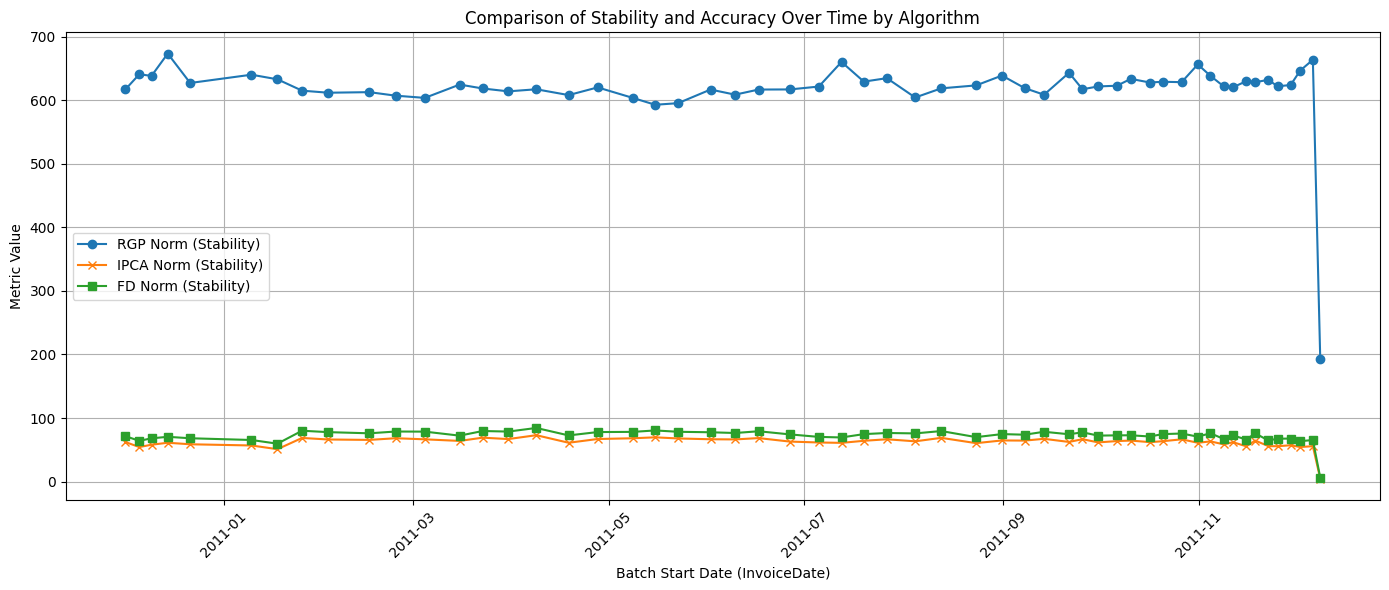

In [ ]:
import pandas as pd
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA
from numpy.linalg import norm
import matplotlib.pyplot as plt

df = pd.read_excel('Online Retail.xlsx')
df_sorted = df.sort_values('InvoiceDate')
batch_size = 10000
batches = [df_sorted.iloc[i:i + batch_size] for i in range(0, len(df_sorted), batch_size)]

rgp_norms = []
ipca_norms = []
fd_norms = []
rgp_mse = []
ipca_mse = []
fd_mse = []
invoice_dates = []

for idx,batch in enumerate(batches):
  invoice_dates.append(batch['InvoiceDate'].iloc[0])
  binary_matrix = pd.crosstab(batch['InvoiceNo'], batch['StockCode'])
  binary_matrix = (binary_matrix > 0).astype(int)
  X = binary_matrix.to_numpy()

  rgp = GaussianRandomProjection(n_components=50)
  rgp_result = rgp.fit_transform(X)
  W = rgp.components_
  re_rgp = rgp_result @ W
  #print(f"Batch {idx+1}: Shape={rgp_result.shape}, Frobenius={norm(X - re_rgp, 'fro')}, MSE={np.mean((X - re_rgp) ** 2)}, ExplainedVar=Not Applicable")
  rgp_norms.append(norm(X - re_rgp, 'fro'))
  rgp_mse.append(np.mean((X - re_rgp) ** 2))



  ipca = IncrementalPCA(n_components=50)
  ipca.partial_fit(X)
  ipca_result = ipca.transform(X)
  re_ipca = ipca.inverse_transform(ipca_result)
  explained_var = np.sum(ipca.explained_variance_ratio_)
  #print(f"Batch {idx+1}: Shape={ipca_result.shape}, Frobenius={norm(X - re_ipca, 'fro')}, MSE={np.mean((X - re_ipca) ** 2)}, ExplainedVar={explained_var}")
  ipca_norms.append(norm(X - re_ipca, 'fro'))
  ipca_mse.append(np.mean((X - re_ipca) ** 2))
  #invoice_dates.append(explained_var)


  l = 50
  n, d = X.shape
  fd = np.zeros((l, d))
  for i in range(n):
    a = X[i,:].reshape(1, -1)
    fd = np.vstack((fd, a))
    U, S, Vt = np.linalg.svd(fd, full_matrices=False)
    delta = S[l-1]**2
    S = np.sqrt(np.maximum(S**2 - delta, 0))
    fd = np.diag(S) @ Vt
    fd = fd[:l, :]
    fd_result = X @ fd.T
  re_fd = fd_result @ np.linalg.pinv(fd).T
  #print(f"Batch {idx+1}: Shape={fd_result.shape}, Frobenius={norm(X - re_fd, 'fro')}, MSE={np.mean((X - re_fd) ** 2)}, ExplainedVar=Not Applicable")
  fd_norms.append(norm(X - re_fd, 'fro'))
  fd_mse.append(np.mean((X - re_fd) ** 2))

plt.figure(figsize=(14, 6))
print(invoice_dates[:10])
print(rgp_norms[:10])
print(ipca_norms[:10])
print(fd_norms[:10])
plt.plot(invoice_dates, rgp_norms, marker='o', label='RGP Norm (Stability)')
plt.plot(invoice_dates, ipca_norms, marker='x', label='IPCA Norm (Stability)')
plt.plot(invoice_dates, fd_norms, marker='s', label='FD Norm (Stability)')
# plt.plot(invoice_dates, rgp_mse, marker='o', linestyle='--', label='RGP MSE (Accuracy)')
# plt.plot(invoice_dates, ipca_mse, marker='x', linestyle='--', label='IPCA MSE (Accuracy)')
# plt.plot(invoice_dates, fd_mse, marker='s', linestyle='--', label='FD MSE (Accuracy)')
plt.title('Comparison of Stability and Accuracy Over Time by Algorithm')
plt.xlabel('Batch Start Date (InvoiceDate)')
plt.ylabel('Metric Value')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





step 7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import IncrementalPCA
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
import datetime
import warnings

warnings.filterwarnings("ignore")

df = pd.read_excel('Online Retail.xlsx')
df_sorted = df.sort_values('InvoiceDate')
# binary_matrix = pd.crosstab(df_sorted['InvoiceNo'], df_sorted['StockCode'])
# binary_matrix = (binary_matrix > 0).astype(int)







batch_size = 10000
batches = [df_sorted.iloc[i:i + batch_size] for i in range(0, len(df_sorted), batch_size)]

batch = batches[1]
for countr in range(1):
  #print(batch)
  binary_matrix = pd.crosstab(batch['InvoiceNo'], batch['StockCode'])
  binary_matrix = (binary_matrix > 0).astype(int)
  X = binary_matrix.to_numpy()

  min_support = 0.01

  start_time = datetime.datetime.utcnow().timestamp()
  frequent_itemsets_apriori = apriori(binary_matrix, min_support=min_support, use_colnames=True)
  apriori_time = datetime.datetime.utcnow().timestamp() - start_time
  print("\n=== APRIORI RESULTS ===")
  print(f"Runtime: {apriori_time:.4f} seconds")
  print("Top frequent itemsets:")
  print(frequent_itemsets_apriori.sort_values(by="support", ascending=False).head(10))


  rgp = GaussianRandomProjection(n_components=50)
  rgp_result = rgp.fit_transform(X)
  df_rgp_result = pd.DataFrame(rgp_result, columns=[f'item_{i}' for i in range(rgp_result.shape[1])])
  start_time = datetime.datetime.utcnow().timestamp()
  frequent_itemsets_apriori = apriori(df_rgp_result, min_support=min_support, use_colnames=True)
  apriori_time = datetime.datetime.utcnow().timestamp() - start_time

  ipca = IncrementalPCA(n_components=50)
  ipca.partial_fit(X)
  ipca_result = ipca.transform(X)
  df_ipca_result = pd.DataFrame(ipca_result, columns=[f'item_{i}' for i in range(ipca_result.shape[1])])
  start_time = datetime.datetime.utcnow().timestamp()
  frequent_itemsets_apriori = apriori(df_ipca_result, min_support=min_support, use_colnames=True)
  apriori_time = datetime.datetime.utcnow().timestamp() - start_time



  l = 50
  n, d = X.shape
  fd = np.zeros((l, d))
  for i in range(n):
    a = X[i,:].reshape(1, -1)
    fd = np.vstack((fd, a))
    U, S, Vt = np.linalg.svd(fd, full_matrices=False)
    delta = S[l-1]**2
    S = np.sqrt(np.maximum(S**2 - delta, 0))
    fd = np.diag(S) @ Vt
    fd = fd[:l, :]
    ffd = X @ fd.T
  df_ffd = pd.DataFrame(ffd, columns=[f'item_{i}' for i in range(ffd.shape[1])])
  start_time = datetime.datetime.utcnow().timestamp()
  frequent_itemsets_apriori = apriori(df_ffd, min_support=min_support, use_colnames=True)
  apriori_time = datetime.datetime.utcnow().timestamp() - start_time

